In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/emmagueorguieva/git/pythontutorials/datasets/008ExerciseFile.csv")

In [3]:
display(data)

,rel_time,m_level
0,-10.000000,166.846602
1,-9.797980,243.656949
2,-9.595960,354.591642
3,-9.393939,209.023218
4,-9.191919,283.431508
...,...,...
95,9.191919,255.174991
96,9.393939,152.987761
97,9.595960,142.685158
98,9.797980,189.684193


In [10]:
sns.set_theme()

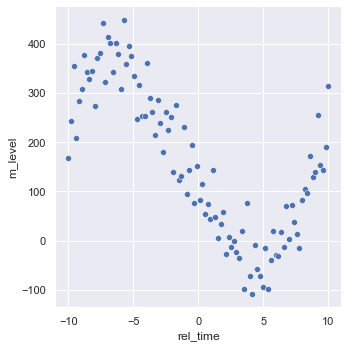

In [8]:
sns.relplot(data=data, x='rel_time', y='m_level')

This data is likely not going to be best fit with a linear model, but let's try it.

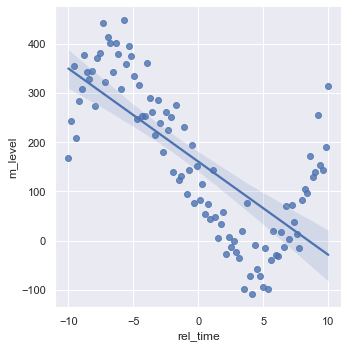

In [9]:
sns.lmplot(data=data, x='rel_time', y='m_level')

I can immediately reject this fit because visually the data clearly follows a polynominal pattern like a sin wave. I can also reject the linear model because there is an enormous amount of error around the line, which is coming from it being a poor fit for this data.

I will check one more thing to verify that the fit is poor.

<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

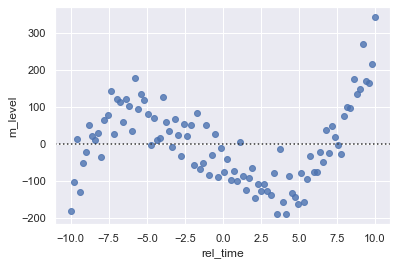

In [12]:
sns.residplot(data=data, x='rel_time', y='m_level')

A residual plot that has a clear pattern is a bad sign! Let's keep looking for the right fit. I'm going to skip straight to trying a third order polynomial because a second order polynomial

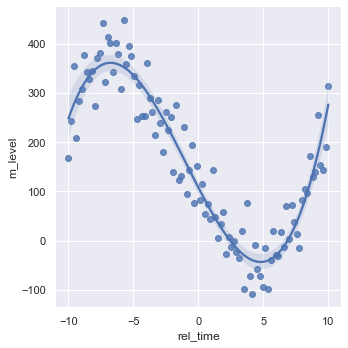

In [26]:
sns.lmplot(data=data, x='rel_time', y='m_level', order=3)

That looks so much better! We really seem to be able to capture the curves using a third order polynomial.

Let's check the residuals and see what they look like now.

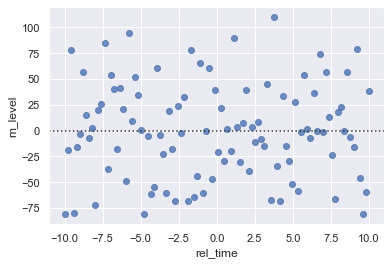

In [27]:
g = sns.residplot(data=data, x='rel_time', y='m_level', order=3)

Okay, now *this* is how they should look. Even spread above and below 0 with no clear pattern.

In [28]:
myfit = np.polyfit(x=data['rel_time'], y=data['m_level'], deg=3)
print(myfit)

[  0.52406776   1.5417871  -50.9901931  107.82613075]


In [29]:
fitvals = np.polyval(myfit, data['rel_time'])

In [30]:
myres = data['m_level'] - fitvals

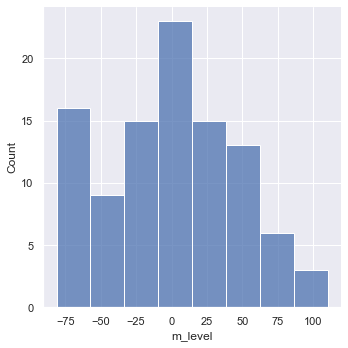

In [31]:
sns.displot(myres)

In [32]:
np.std(myres)

46.02814372678916

Now we can write the equation for our data:
y = 107.83 + -0.52x + 1.54x^2 + -50.99x^3 + N(0,46.03)

But really, looking at the patternless residual and substantially less error around the polynomial model, we can know that it's the best fit for this data!

Lastly, let's make this graph prettier.

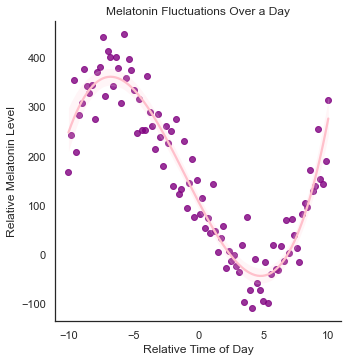

In [73]:
plot = sns.lmplot(data=data, x='rel_time', y='m_level', order=3,
                 line_kws={'color': 'pink'}, scatter_kws={'color': 'purple'})
plot.set(xlabel = "Relative Time of Day")
plot.set(ylabel = "Relative Melatonin Level")
plt.title('Melatonin Fluctuations Over a Day')
sns.set_style("white")